In [71]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
cd ~/demres

/Users/zurfarosa/demres


In [73]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:95% !important; }</style>"))

In [74]:
import os
import sys
from pprint import pprint

import pandas as pd
import numpy as np

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [75]:
%matplotlib inline

In [76]:
pt_features = pd.read_csv('data/pt_data/processed_data/pt_features_dempred.csv',delimiter=',')[['isCase','mood_stabilisers_pdds','sedatives_pdds','sgas_pdds','fga_depots_pdds','antidepressants_pdds','nsaids_pdds','psych_prescription_count','nonpsych_prescription_count']]

In [77]:
pt_features.fillna(value=0,inplace=True)

In [7]:
# mask = (pt_features['mood_stabilisers_pdds']==0)&(pt_features['sedatives_pdds']==0)&(pt_features['sgas_pdds']==0)&(pt_features['fga_depots_pdds']==0)&(pt_features['antidepressants_pdds']==0)

In [8]:
# pt_features[~mask]

In [78]:
len(pt_features[pt_features['isCase']==True])

34741

In [79]:
X = pt_features.drop('isCase',axis=1)

In [80]:
X.shape

(69482, 8)

In [81]:
y = pt_features.loc[:,['isCase']].values.ravel()

In [82]:
y.shape

(69482,)

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [84]:
X_test.shape

(17371, 8)

In [85]:
y_test.shape

(17371,)

In [86]:
lr = LogisticRegression(C=0.1).fit(X_train,y_train)

In [87]:
lr.predict(X_test)

array([False, False, False, ..., False, False, False], dtype=bool)

In [88]:
lr.score(X_test,y_test)

0.57233319900984403

In [89]:
gnb = GaussianNB().fit(X_train,y_train)

In [90]:
gnb.predict(X_test)

array([False, False, False, ..., False, False, False], dtype=bool)

In [91]:
gnb.score(X_test,y_test)

0.52984859823844344

In [92]:
tree = DecisionTreeClassifier(random_state=0,max_depth=3)

In [93]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [94]:
tree.score(X_train,y_train)

0.60129339294966511

In [95]:
tree.score(X_test,y_test)

0.59933222036727885

In [96]:
list(X.columns)

['mood_stabilisers_pdds',
 'sedatives_pdds',
 'sgas_pdds',
 'fga_depots_pdds',
 'antidepressants_pdds',
 'nsaids_pdds',
 'psych_prescription_count',
 'nonpsych_prescription_count']

In [97]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="output/tree_visualisations/tree.dot", class_names=["dementia", "not dementia"],feature_names=list(X.columns), impurity=False, filled=True)

In [98]:
import graphviz

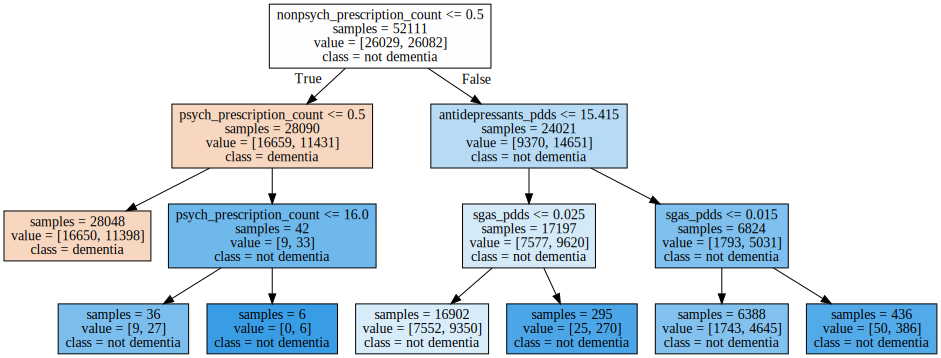

In [99]:
with open("output/tree_visualisations/tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


In [100]:
import pydot

In [101]:
(graph,) = pydot.graph_from_dot_file('output/tree_visualisations/tree.dot')

In [102]:
graph.write_gif('output/tree_visualisations/tree.gif')

True

In [103]:
import matplotlib.pyplot as plt

def plot_feature_importances_cancer(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

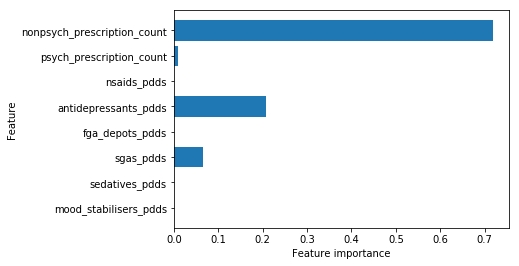

In [104]:
plot_feature_importances_cancer(tree)

In [105]:
pt_features

,isCase,mood_stabilisers_pdds,sedatives_pdds,sgas_pdds,fga_depots_pdds,antidepressants_pdds,nsaids_pdds,psych_prescription_count,nonpsych_prescription_count
0,True,0.00,0.00,0.0,0.0,0.00,0.00,0,0
1,True,0.00,0.00,0.0,0.0,0.00,131.20,1,27
2,True,0.00,0.00,0.0,0.0,0.00,0.00,0,0
3,True,0.00,0.00,0.0,0.0,0.00,0.00,0,92
4,True,0.00,0.00,0.0,0.0,0.00,0.00,0,260
5,True,0.00,0.00,0.0,0.0,0.00,0.00,20,144
6,True,0.00,456.51,234.6,0.0,0.00,0.00,42,7
7,True,610.68,478.93,0.0,0.0,0.00,0.00,45,121
8,True,0.00,0.00,0.0,0.0,0.00,0.00,0,250
9,True,765.45,596.55,0.0,0.0,0.00,193.20,17,168
